In [44]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
from sklearn.metrics import plot_confusion_matrix,auc,roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
import json
import pickle
import warnings
warnings.filterwarnings("ignore")


# Problem statement :

# Data Gathering :

In [45]:
df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Exploratory Data Analysis :

In [47]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<AxesSubplot:xlabel='Species', ylabel='count'>

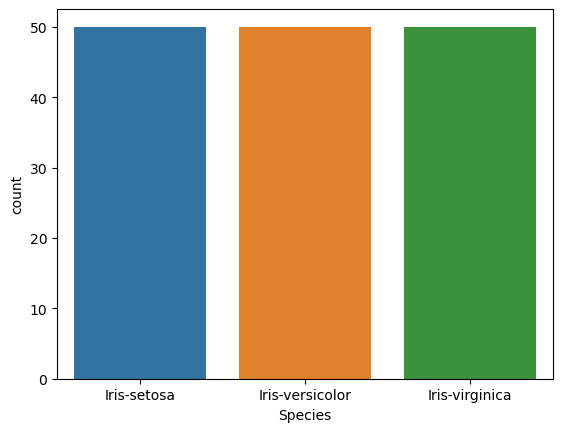

In [48]:
sns.countplot(df["Species"])

# Feature Engineering :

# Feature Selection :

In [49]:
df.drop("Id",axis=1,inplace=True)

# Model Building :

### train test split :

In [50]:
x = df.drop("Species",axis=1)
y = df["Species"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10,stratify=y)

### Modle Build :

In [51]:
logistic_model = LogisticRegression(multi_class="ovr")
logistic_model.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

# Model Evalution :

In [52]:
### testing :
def testing_evalution(model,x,y):
    y_test_pred = model.predict(x)
    
    cnf_matrix = confusion_matrix(y,y_test_pred)
    print("confusion matrix :")
    print(cnf_matrix)
    print("*"*60)
    accuracy = accuracy_score(y,y_test_pred)
    print("testing accuracy is :",accuracy)
    print("*"*60)
    clf_report=classification_report(y,y_test_pred)
    print("testing classification repport is:")
    print(clf_report)
    return y_test_pred

In [53]:
### training :
def training_evalution(model,x,y):
    y_train_pred = model.predict(x)
    
    cnf_matrix = confusion_matrix(y,y_train_pred)
    print("confusion matrix :")
    print(cnf_matrix)
    print("*"*60)
    accuracy = accuracy_score(y,y_train_pred)
    print("training accuracy is :",accuracy)
    print("*"*60)
    clf_report=classification_report(y,y_train_pred)
    print("training classification repport is:")
    print(clf_report)
    return y_train_pred

In [54]:
# testing evalution
y_test_pred = testing_evalution(logistic_model,x_test,y_test)

confusion matrix :
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
************************************************************
testing accuracy is : 1.0
************************************************************
testing classification repport is:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



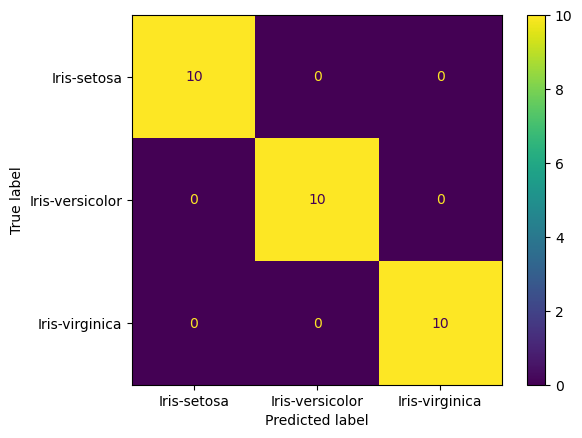

In [55]:
plot_confusion_matrix(logistic_model,x_test,y_test_pred)

In [56]:
y_train_pred = training_evalution(logistic_model,x_train,y_train)

confusion matrix :
[[40  0  0]
 [ 0 35  5]
 [ 0  2 38]]
************************************************************
training accuracy is : 0.9416666666666667
************************************************************
training classification repport is:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       0.95      0.88      0.91        40
 Iris-virginica       0.88      0.95      0.92        40

       accuracy                           0.94       120
      macro avg       0.94      0.94      0.94       120
   weighted avg       0.94      0.94      0.94       120



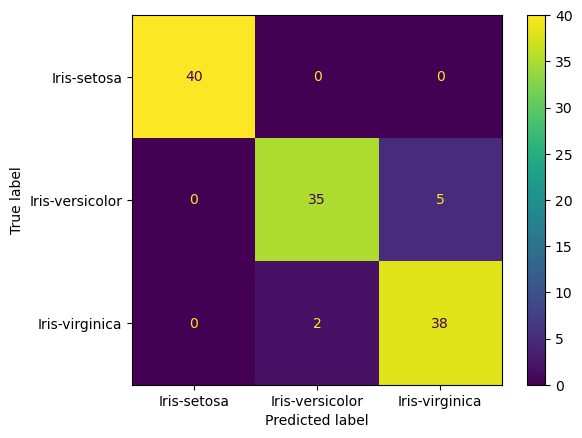

In [57]:
plot_confusion_matrix(logistic_model,x_train,y_train)

# Tesing for single user input value :

In [61]:
x.head(1).T

,0
SepalLengthCm,5.1
SepalWidthCm,3.5
PetalLengthCm,1.4
PetalWidthCm,0.2


In [68]:
SepalLengthCm=5.4
SepalWidthCm=8.0
PetalLengthCm=4.1
PetalWidthCm=9.2

In [69]:
array = np.array([SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm])
print("test array is :",array)

test array is : [5.4 8.  4.1 9.2]


In [70]:
prediction = logistic_model.predict([array])
prediction[0]

'Iris-virginica'

# create pickle file

In [71]:
with open("iris_logistic.pkl","wb") as m :
    pickle.dump(logistic_model,m)